In [96]:
# Import Dependencies
import pandas as pd 
import numpy
import requests
import json
import datetime as dt
from sqlalchemy import create_engine

# From open data to retrieve lat and lon of station_id 

In [97]:
url = "https://tor.publicbikesystem.net/ube/gbfs/v1/en/station_information"
print(requests.get(url))

<Response [200]>


In [98]:
# Pretty Print the output of the JSON
response = requests.get(url).json()
#print(json.dumps(response, indent=4, sort_keys=True))
station_id = response['data']['stations'][0]['station_id']
lat = response['data']['stations'][0]['lat']
lon = response['data']['stations'][0]['lon']
capacity=response['data']['stations'][0]['capacity']

In [99]:
# Retrieve data: station_id, lat, lon, capacity
stations = response['data']['stations']
lat = response['data']['stations']
lon = response['data']['stations']
capacity = response['data']['stations']

station_id = []
station_name =[]
lats = []
lons = []
capacity = []
for station in stations: 
    #print(station["station_id"])
    station_id.append(station["station_id"])
    station_name.append(station["name"])
    lats.append(station['lat'])
    lons.append(station['lon'])
    capacity.append(station['capacity'])
    

In [100]:
# Create data frame 
station_coordinate = pd.DataFrame({"station_id":station_id,"station_name":station_name,"lat":lats,"lon":lons,"capacity":capacity}).copy()
station_coordinate

,station_id,station_name,lat,lon,capacity
0,7000,Fort York Blvd / Capreol Ct,43.639832,-79.395954,35
1,7001,Lower Jarvis St / The Esplanade,43.647992,-79.370907,15
2,7002,St. George St / Bloor St W,43.667333,-79.399429,19
3,7003,Madison Ave / Bloor St W,43.667158,-79.402761,15
4,7004,University Ave / Elm St,43.656518,-79.389099,10
...,...,...,...,...,...
459,7506,Berkeley St / Adelaide St E - SMART,43.653359,-79.365023,12
460,7508,Berkeley St / Dundas St E - SMART,43.658816,-79.367318,18
461,7509,Ontario St / King St E,43.651814,-79.366194,19
462,7510,Princes' Blvd / Nunavut Rd,43.633225,-79.414319,19


In [101]:
# Create data frame 
stations = pd.DataFrame({"station_id":station_id,"station_name":station_name,"lat":lats,"lon":lons,"capacity":capacity})
#stations = stations.set_index(['station_id'])
stations

,station_id,station_name,lat,lon,capacity
0,7000,Fort York Blvd / Capreol Ct,43.639832,-79.395954,35
1,7001,Lower Jarvis St / The Esplanade,43.647992,-79.370907,15
2,7002,St. George St / Bloor St W,43.667333,-79.399429,19
3,7003,Madison Ave / Bloor St W,43.667158,-79.402761,15
4,7004,University Ave / Elm St,43.656518,-79.389099,10
...,...,...,...,...,...
459,7506,Berkeley St / Adelaide St E - SMART,43.653359,-79.365023,12
460,7508,Berkeley St / Dundas St E - SMART,43.658816,-79.367318,18
461,7509,Ontario St / King St E,43.651814,-79.366194,19
462,7510,Princes' Blvd / Nunavut Rd,43.633225,-79.414319,19


In [108]:
# Save to csv
stations.to_csv("../stations.csv",index=False,header=True)

In [141]:
From_station=stations[['station_id','lat','lon']].rename(columns={'station_id':'from_station_id','lat':'origin_lat','lon':'origin_lon'})
From_station.head().reset_index()

,index,from_station_id,origin_lat,origin_lon
0,30,7030,43.664088,-79.387095
1,48,7048,43.646144,-79.377962
2,386,7426,43.636804,-79.408832
3,37,7037,43.652300,-79.405800
4,361,7398,43.641160,-79.379790


In [198]:
To_station=stations[['station_id','lat','lon']].rename(columns={'station_id':'to_station_id','lat':'destination_lat','lon':'destination_lon'})
To_station.head().reset_index()

,index,to_station_id,destination_lat,destination_lon
0,30,7030,43.664088,-79.387095
1,48,7048,43.646144,-79.377962
2,386,7426,43.636804,-79.408832
3,37,7037,43.652300,-79.405800
4,361,7398,43.641160,-79.379790


In [109]:
stations.dtypes

station_id       object
station_name     object
lat             float64
lon             float64
capacity          int64
dtype: object

In [110]:
%matplotlib inline
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

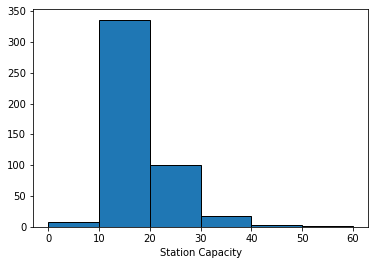

In [137]:
# Analysis of Station Cpacity
bins= [0,10,20,30,40,50,60]
plt.hist(stations['capacity'], bins=bins, edgecolor="k")
plt.xticks(bins)
plt.xlabel("Station Capacity")
           
plt.show()

In [112]:
# Top 10 Station listing
stations.sort_values('capacity',ascending=False,inplace=True)
stations.head(10)

,station_id,station_name,lat,lon,capacity
30,7030,Bay St / Wellesley St W,43.664088,-79.387095,51
48,7048,Front St W / Yonge St (Hockey Hall of Fame),43.646144,-79.377962,47
386,7426,Fleet St / Garrison Rd (Fort York),43.636804,-79.408832,42
37,7037,Bathurst St / Dundas St W,43.652300,-79.405800,40
361,7398,York St / Harbour St,43.641160,-79.379790,39
67,7067,Yonge St / Harbour St,43.643795,-79.375413,39
430,7472,Dundas St E / Victoria St,43.656333,-79.379114,39
24,7024,Dundonald St / Church St,43.666630,-79.381480,36
0,7000,Fort York Blvd / Capreol Ct,43.639832,-79.395954,35
21,7021,Bay St / Albert St,43.653264,-79.382458,35


# Import and clean the quarterly bikeshare files

In [146]:
quarter_one_file_path = "2017 Data/Bikeshare Ridership (2017 Q1).csv"
quarter_one = pd.read_csv(quarter_one_file_path)
quarter_one.head()

,trip_id,trip_start_time,trip_stop_time,trip_duration_seconds,from_station_id,from_station_name,to_station_id,to_station_name,user_type
0,712382,1/1/2017 0:00,1/1/2017 0:03,223,7051,Wellesley St E / Yonge St Green P,7089,Church St / Wood St,Member
1,712383,1/1/2017 0:00,1/1/2017 0:05,279,7143,Kendal Ave / Bernard Ave,7154,Bathurst Subway Station,Member
2,712384,1/1/2017 0:05,1/1/2017 0:29,1394,7113,Parliament St / Aberdeen Ave,7199,College St W / Markham St,Member
3,712385,1/1/2017 0:07,1/1/2017 0:21,826,7077,College Park South,7010,King St W / Spadina Ave,Member
4,712386,1/1/2017 0:08,1/1/2017 0:12,279,7079,McGill St / Church St,7047,University Ave / Gerrard St W,Member


In [147]:
quarter_two_file_path = "2017 Data/Bikeshare Ridership (2017 Q2).csv"
quarter_two = pd.read_csv(quarter_two_file_path)
quarter_two.head()

,trip_id,trip_start_time,trip_stop_time,trip_duration_seconds,from_station_id,from_station_name,to_station_id,to_station_name,user_type
0,868665,1/4/2017 0:01,1/4/2017 0:06,297,7073,Bremner Blvd / Spadina Ave,7211,Fort York Blvd / Garrison Rd,Member
1,868666,1/4/2017 0:07,1/4/2017 0:11,236,7038,Dundas St / Yonge St,7163,Yonge St / Wood St,Member
2,868667,1/4/2017 0:08,1/4/2017 0:14,380,7012,Elizabeth St / Edward St (Bus Terminal),7069,Queen St W / Spadina Ave,Member
3,868668,1/4/2017 0:12,1/4/2017 0:34,1299,7172,Strachan Ave / Princes' Blvd,7069,Queen St W / Spadina Ave,Member
4,868669,1/4/2017 0:13,1/4/2017 0:18,323,7039,Simcoe St / Dundas St W,7021,Bay St / Albert St,Member


In [148]:
# Merge quarter_one and quarter_two
first_half_year = pd.concat([quarter_one,quarter_two])

# Change to datetime 
first_half_year['trip_start_time'] = pd.to_datetime(first_half_year['trip_start_time'],format = '%d/%m/%Y %H:%M')
first_half_year['trip_stop_time'] = pd.to_datetime(first_half_year['trip_stop_time'],format = '%d/%m/%Y %H:%M')
first_half_year.dropna()
first_half_year.head()

,trip_id,trip_start_time,trip_stop_time,trip_duration_seconds,from_station_id,from_station_name,to_station_id,to_station_name,user_type
0,712382,2017-01-01 00:00:00,2017-01-01 00:03:00,223,7051,Wellesley St E / Yonge St Green P,7089,Church St / Wood St,Member
1,712383,2017-01-01 00:00:00,2017-01-01 00:05:00,279,7143,Kendal Ave / Bernard Ave,7154,Bathurst Subway Station,Member
2,712384,2017-01-01 00:05:00,2017-01-01 00:29:00,1394,7113,Parliament St / Aberdeen Ave,7199,College St W / Markham St,Member
3,712385,2017-01-01 00:07:00,2017-01-01 00:21:00,826,7077,College Park South,7010,King St W / Spadina Ave,Member
4,712386,2017-01-01 00:08:00,2017-01-01 00:12:00,279,7079,McGill St / Church St,7047,University Ave / Gerrard St W,Member


In [167]:
first_half_year.dtypes

trip_id                           int64
trip_start_time          datetime64[ns]
trip_stop_time           datetime64[ns]
trip_duration_seconds             int64
from_station_id                   int64
from_station_name                object
to_station_id                     int64
to_station_name                  object
user_type                        object
dtype: object

In [150]:
quarter_three_file_path = "2017 Data/Bikeshare Ridership (2017 Q3).csv"
quarter_three = pd.read_csv(quarter_three_file_path)

#Change trip_start_time and trip_stop_time to datetime 
quarter_three['trip_start_time'] = pd.to_datetime(quarter_three['trip_start_time'],format = '%m/%d/%Y %H:%M')
quarter_three['trip_stop_time'] = pd.to_datetime(quarter_three['trip_stop_time'],format = '%m/%d/%Y %H:%M')
quarter_three.head()

,trip_id,trip_start_time,trip_stop_time,trip_duration_seconds,from_station_name,to_station_name,user_type
0,1253914,2017-07-01 00:00:00,2017-07-01 00:15:00,910,Princess St / Adelaide St E,424 Wellington St W,Member
1,1253915,2017-07-01 00:01:00,2017-07-01 00:15:00,837,Fort York Blvd / Capreol Crt,HTO Park (Queens Quay W),Casual
2,1253916,2017-07-01 00:01:00,2017-07-01 00:14:00,786,Fort York Blvd / Capreol Crt,HTO Park (Queens Quay W),Casual
3,1253917,2017-07-01 00:01:00,2017-07-01 00:25:00,1420,Elizabeth St / Edward St (Bus Terminal),Boston Ave / Queen St E,Casual
4,1253918,2017-07-01 00:01:00,2017-07-01 00:25:00,1437,Elizabeth St / Edward St (Bus Terminal),Boston Ave / Queen St E,Casual


In [151]:
quarter_four_file_path = "2017 Data/Bikeshare Ridership (2017 Q4).csv"
quarter_four= pd.read_csv(quarter_four_file_path)
quarter_four = quarter_four.dropna()

#Change trip_start_time and trip_stop_time to datetime format 
quarter_four['trip_start_time'] = pd.to_datetime(quarter_four['trip_start_time'],format = '%m/%d/%y %H:%M:%S')
quarter_four['trip_stop_time'] = pd.to_datetime(quarter_four['trip_stop_time'],format = '%m/%d/%y %H:%M:%S')
quarter_four.head()

,trip_id,trip_start_time,trip_stop_time,trip_duration_seconds,from_station_name,to_station_name,user_type
0,1971685,2017-10-01 00:00:01,2017-10-01 00:14:10,849,Queen St W / James St,Taddle Creek Park,Member
1,1971686,2017-10-01 00:00:01,2017-10-01 00:00:27,26,Stewart St / Bathurst St - SMART,Stewart St / Bathurst St - SMART,Casual
2,1971687,2017-10-01 00:00:22,2017-10-01 00:22:12,1310,Hayter St / Laplante Ave,Queen St W / Portland St,Member
3,1971688,2017-10-01 00:00:38,2017-10-01 00:11:09,631,Beverly St / College St,Beverly St / Dundas St W,Member
4,1971689,2017-10-01 00:00:55,2017-10-01 00:20:53,1198,Thompson St / Broadview Ave - SMART,Thompson St / Broadview Ave - SMART,Member


In [152]:
# Merge quarter_three and quarter_four
second_half_year = pd.concat([quarter_three,quarter_four])
second_half_year.head()

,trip_id,trip_start_time,trip_stop_time,trip_duration_seconds,from_station_name,to_station_name,user_type
0,1253914,2017-07-01 00:00:00,2017-07-01 00:15:00,910,Princess St / Adelaide St E,424 Wellington St W,Member
1,1253915,2017-07-01 00:01:00,2017-07-01 00:15:00,837,Fort York Blvd / Capreol Crt,HTO Park (Queens Quay W),Casual
2,1253916,2017-07-01 00:01:00,2017-07-01 00:14:00,786,Fort York Blvd / Capreol Crt,HTO Park (Queens Quay W),Casual
3,1253917,2017-07-01 00:01:00,2017-07-01 00:25:00,1420,Elizabeth St / Edward St (Bus Terminal),Boston Ave / Queen St E,Casual
4,1253918,2017-07-01 00:01:00,2017-07-01 00:25:00,1437,Elizabeth St / Edward St (Bus Terminal),Boston Ave / Queen St E,Casual


In [153]:
# Insert station id to the second_half_year
add_station_ids = second_half_year.merge(stations, left_on = "from_station_name", right_on ="station_name", how = "left")\
   .merge(stations, left_on = "to_station_name", right_on ="station_name", how = "left")

add_station_ids.head()

,trip_id,trip_start_time,trip_stop_time,trip_duration_seconds,from_station_name,to_station_name,user_type,station_id_x,station_name_x,lat_x,lon_x,capacity_x,station_id_y,station_name_y,lat_y,lon_y,capacity_y
0,1253914,2017-07-01 00:00:00,2017-07-01 00:15:00,910,Princess St / Adelaide St E,424 Wellington St W,Member,7060,Princess St / Adelaide St E,43.652123,-79.367139,19.0,7123,424 Wellington St W,43.643834,-79.396649,15.0
1,1253915,2017-07-01 00:01:00,2017-07-01 00:15:00,837,Fort York Blvd / Capreol Crt,HTO Park (Queens Quay W),Casual,NaN,NaN,NaN,NaN,NaN,7175,HTO Park (Queens Quay W),43.637960,-79.387502,27.0
2,1253916,2017-07-01 00:01:00,2017-07-01 00:14:00,786,Fort York Blvd / Capreol Crt,HTO Park (Queens Quay W),Casual,NaN,NaN,NaN,NaN,NaN,7175,HTO Park (Queens Quay W),43.637960,-79.387502,27.0
3,1253917,2017-07-01 00:01:00,2017-07-01 00:25:00,1420,Elizabeth St / Edward St (Bus Terminal),Boston Ave / Queen St E,Casual,7012,Elizabeth St / Edward St (Bus Terminal),43.656026,-79.385327,15.0,7096,Boston Ave / Queen St E,43.661508,-79.338931,19.0
4,1253918,2017-07-01 00:01:00,2017-07-01 00:25:00,1437,Elizabeth St / Edward St (Bus Terminal),Boston Ave / Queen St E,Casual,7012,Elizabeth St / Edward St (Bus Terminal),43.656026,-79.385327,15.0,7096,Boston Ave / Queen St E,43.661508,-79.338931,19.0


In [154]:
second_half_year = add_station_ids.copy()

#Rename columns name
second_half_year = second_half_year.rename(columns={"station_id_x": "from_station_id",
                                                    "station_id_y": "to_station_id"})

In [155]:
#Reposition columns
second_half_year = second_half_year[['trip_id',
                                     'trip_start_time', 
                                     'trip_stop_time',
                                     'trip_duration_seconds',
                                     'from_station_id',
                                     'from_station_name',
                                     'to_station_id', 
                                     'to_station_name', 
                                     'user_type']]

second_half_year = second_half_year.dropna()
second_half_year.head()

,trip_id,trip_start_time,trip_stop_time,trip_duration_seconds,from_station_id,from_station_name,to_station_id,to_station_name,user_type
0,1253914,2017-07-01 00:00:00,2017-07-01 00:15:00,910,7060,Princess St / Adelaide St E,7123,424 Wellington St W,Member
3,1253917,2017-07-01 00:01:00,2017-07-01 00:25:00,1420,7012,Elizabeth St / Edward St (Bus Terminal),7096,Boston Ave / Queen St E,Casual
4,1253918,2017-07-01 00:01:00,2017-07-01 00:25:00,1437,7012,Elizabeth St / Edward St (Bus Terminal),7096,Boston Ave / Queen St E,Casual
5,1253919,2017-07-01 00:03:00,2017-07-01 00:25:00,1332,7026,Bay St / St. Joseph St,7046,Niagara St / Richmond St W,Member
6,1253920,2017-07-01 00:04:00,2017-07-01 00:53:00,2930,7006,Bay St / College St (East Side),7038,Dundas St W / Yonge St,Casual


In [168]:
second_half_year.dtypes


trip_id                           int64
trip_start_time          datetime64[ns]
trip_stop_time           datetime64[ns]
trip_duration_seconds             int64
from_station_id                  object
from_station_name                object
to_station_id                    object
to_station_name                  object
user_type                        object
dtype: object

In [156]:
# Merge quarters to a year 
bike_share_2017 =  pd.concat([first_half_year ,second_half_year])
bike_share_2017

,trip_id,trip_start_time,trip_stop_time,trip_duration_seconds,from_station_id,from_station_name,to_station_id,to_station_name,user_type
0,712382,2017-01-01 00:00:00,2017-01-01 00:03:00,223,7051,Wellesley St E / Yonge St Green P,7089,Church St / Wood St,Member
1,712383,2017-01-01 00:00:00,2017-01-01 00:05:00,279,7143,Kendal Ave / Bernard Ave,7154,Bathurst Subway Station,Member
2,712384,2017-01-01 00:05:00,2017-01-01 00:29:00,1394,7113,Parliament St / Aberdeen Ave,7199,College St W / Markham St,Member
3,712385,2017-01-01 00:07:00,2017-01-01 00:21:00,826,7077,College Park South,7010,King St W / Spadina Ave,Member
4,712386,2017-01-01 00:08:00,2017-01-01 00:12:00,279,7079,McGill St / Church St,7047,University Ave / Gerrard St W,Member
...,...,...,...,...,...,...,...,...,...
1026884,2383639,2017-12-31 23:35:41,2017-12-31 23:54:33,1132,7033,Union Station,7100,Dundas St E / Regent Park Blvd,Member
1026885,2383640,2017-12-31 23:37:43,2017-12-31 23:43:00,317,7152,Ossington Ave / Bloor St W,7184,Ossington Ave / College St,Member
1026889,2383644,2017-12-31 23:47:40,2017-12-31 23:57:49,609,7132,Kendal Ave / Spadina Rd,7189,Augusta Ave / Denison Sq,Member
1026890,2383645,2017-12-31 23:49:08,2017-12-31 23:49:34,26,7020,Phoebe St / Spadina Ave,7020,Phoebe St / Spadina Ave,Member


In [157]:
bike_share_2017.isnull().sum()

trip_id                  0
trip_start_time          0
trip_stop_time           0
trip_duration_seconds    0
from_station_id          0
from_station_name        0
to_station_id            0
to_station_name          0
user_type                0
dtype: int64

In [158]:
bike_share_2017.to_csv("2017 Data/bike_share_2017.csv",index=False,header=True)

# Analysis and Visualization of 2017 Toronto Bike Share

In [182]:
# Merged Station lat and lon to bike_share_2017
bike_share_2017["from_station_id"]=bike_share_2017["from_station_id"].astype(int)
From_station["from_station_id"]=From_station["from_station_id"].astype(int)
bike_share_2017_from = bike_share_2017.merge(From_station, on = "from_station_id", how = "left")
bike_share_2017_from.head()

,trip_id,trip_start_time,trip_stop_time,trip_duration_seconds,from_station_id,from_station_name,to_station_id,to_station_name,user_type,origin_lat,origin_lon
0,712382,2017-01-01 00:00:00,2017-01-01 00:03:00,223,7051,Wellesley St E / Yonge St Green P,7089,Church St / Wood St,Member,43.665060,-79.383570
1,712383,2017-01-01 00:00:00,2017-01-01 00:05:00,279,7143,Kendal Ave / Bernard Ave,7154,Bathurst Subway Station,Member,43.671513,-79.408317
2,712384,2017-01-01 00:05:00,2017-01-01 00:29:00,1394,7113,Parliament St / Aberdeen Ave,7199,College St W / Markham St,Member,43.665278,-79.368333
3,712385,2017-01-01 00:07:00,2017-01-01 00:21:00,826,7077,College Park South,7010,King St W / Spadina Ave,Member,43.659777,-79.382767
4,712386,2017-01-01 00:08:00,2017-01-01 00:12:00,279,7079,McGill St / Church St,7047,University Ave / Gerrard St W,Member,43.660694,-79.379052


In [183]:
bike_share_2017_from.to_csv("2017 Data/bike_share_2017_from.csv",index=False,header=True)

In [199]:
# Merged Station lat and lon to bike_share_2017
To_station["to_station_id"]=To_station["to_station_id"].astype(int)
bike_share_final = bike_share_2017_from.merge(To_station, on = "to_station_id", how = "left")
bike_share_final.head()

,trip_id,trip_start_time,trip_stop_time,trip_duration_seconds,from_station_id,from_station_name,to_station_id,to_station_name,user_type,origin_lat,origin_lon,destination_lat,destination_lon
0,712382,2017-01-01 00:00:00,2017-01-01 00:03:00,223,7051,Wellesley St E / Yonge St Green P,7089,Church St / Wood St,Member,43.665060,-79.383570,43.662712,-79.379903
1,712383,2017-01-01 00:00:00,2017-01-01 00:05:00,279,7143,Kendal Ave / Bernard Ave,7154,Bathurst Subway Station,Member,43.671513,-79.408317,43.666667,-79.411667
2,712384,2017-01-01 00:05:00,2017-01-01 00:29:00,1394,7113,Parliament St / Aberdeen Ave,7199,College St W / Markham St,Member,43.665278,-79.368333,43.656389,-79.409167
3,712385,2017-01-01 00:07:00,2017-01-01 00:21:00,826,7077,College Park South,7010,King St W / Spadina Ave,Member,43.659777,-79.382767,43.645323,-79.395003
4,712386,2017-01-01 00:08:00,2017-01-01 00:12:00,279,7079,McGill St / Church St,7047,University Ave / Gerrard St W,Member,43.660694,-79.379052,43.657763,-79.389165


In [214]:
bike_share_final.isnull().sum()

trip_id                  0
trip_start_time          0
trip_stop_time           0
trip_duration_seconds    0
from_station_id          0
from_station_name        0
to_station_id            0
to_station_name          0
user_type                0
origin_lat               0
origin_lon               0
destination_lat          0
destination_lon          0
dtype: int64

In [228]:
bike_share_final['origin_lat']=bike_share_final['origin_lat'].astype(float)
bike_share_final['origin_lon']=bike_share_final['origin_lon'].astype(float)
bike_share_final['destination_lat']=bike_share_final['destination_lat'].astype(float)
bike_share_final['destination_lon']=bike_share_final['destination_lon'].astype(float)

In [240]:
bike_share_final.to_csv("2017 Data/bike_share_final.csv",index=False,header=True)

# Load data to database

In [127]:
connection_string = "postgres:postgres@localhost:5432/bikeshare_db"
engine = create_engine(f'postgresql://{connection_string}')

In [128]:
# Confirm tables
engine.table_names()

OperationalError: (psycopg2.OperationalError) FATAL:  database "bikeshare_db" does not exist

(Background on this error at: http://sqlalche.me/e/e3q8)

In [ ]:
station_coordinate.to_sql(name='station_coordinate', con=engine, if_exists='append', index=False)

In [ ]:
bike_share_2017.to_sql(name='bike_share_2017', con=engine, if_exists='append', index=False)